# Calculations under the MS-SMC' using *ipcoal*

In [26]:
import toytree
import ipcoal
import numpy as np

### Get a parameterized species tree
Generate a species tree with arbitrary variation in divergence times and effective population sizes. Species tree branch lengths are shown in units of generations.

In [41]:
# get an ultrametric 8-tip species tree topology
stree = toytree.rtree.unittree(ntips=8, treeheight=1e6, seed=123)

# set constant Ne value to all Nodes (species tree intervals)
stree.set_node_data(feature="Ne", default=2e5, inplace=True)

# draw the species tree showing Ne variation as edge width
stree.draw(ts='p');

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="260.0px" viewBox="0 0 350.0 260.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="ta11d87a204b74ab6927af4f1a1a1f2ef"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 r0 r1 r2 r3 r4 r5 r6 r7 0 500000 1000000

### Simulate an embedded genealogy for 2 samples per species

In [49]:
# setup an MSC simulator
model = ipcoal.Model(tree=stree, nsamples=2, seed_trees=123)

# simulate one genealogy
model.sim_trees(1)

# load the first genealogy as a Toytree and draw it.
gtree = toytree.tree(model.df.genealogy[0])
gtree.draw(ts='c', width=450, node_labels="idx", node_labels_style={"baseline-shift": 8, "-toyplot-anchor-shift": 6});

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="450.0px" height="270.0px" viewBox="0 0 450.0 270.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t6c3c5f3357014c1588ce682fead29fba"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 r7_0 r7_1 r6_0 r6_1 r1_0 r1_1 r2_0 r2_1 r3_0 r3_1 r0_0 r0_1 r4_0 r4_1 r5_0 r5_1 0 800000 1600000

### Get mapping of species to samples

In [50]:
imap = model.get_imap_dict()
imap

{'r0': ['r0_0', 'r0_1'],
 'r1': ['r1_0', 'r1_1'],
 'r2': ['r2_0', 'r2_1'],
 'r3': ['r3_0', 'r3_1'],
 'r4': ['r4_0', 'r4_1'],
 'r5': ['r5_0', 'r5_1'],
 'r6': ['r6_0', 'r6_1'],
 'r7': ['r7_0', 'r7_1']}

### Decompose species tree and genealogy into a genealogy embedding table

In [90]:
# get genealogy embedding table
etable = ipcoal.smc.get_genealogy_embedding_table(stree, gtree, imap)
etable

,start,stop,st_node,neff,nedges,coal,edges,dist
0,0.000000e+00,250000.0,0,200000.0,2,<NA>,"[10, 11]",250000.0
1,0.000000e+00,71867.797462,1,200000.0,2,19,"[4, 5]",71867.797462
2,7.186780e+04,250000.0,1,200000.0,1,<NA>,[19],178132.202538
3,2.500000e+05,446176.916229,8,200000.0,3,23,"[10, 11, 19]",196176.916229
4,4.461769e+05,500000.0,8,200000.0,2,<NA>,"[19, 23]",53823.083771
5,0.000000e+00,77579.504166,2,200000.0,2,20,"[6, 7]",77579.504166
6,7.757950e+04,250000.0,2,200000.0,1,<NA>,[20],172420.495834
7,0.000000e+00,97535.490741,3,200000.0,2,21,"[8, 9]",97535.490741
8,9.753549e+04,250000.0,3,200000.0,1,<NA>,[21],152464.509259
9,2.500000e+05,372894.857214,9,200000.0,2,22,"[20, 21]",122894.857214


## MS-SMC Calculations

In [52]:
# sample a time for recombination to occur on the middle of genealogy branch BRANCH
time = (gtree[BRANCH].up.height - gtree[BRANCH].height) / 2

### $P(\text{tree-unchanged}| \mathcal{S}, \mathcal{G}, b, t_r)$

In [53]:
ipcoal.smc.get_probability_tree_unchanged_given_b_and_tr(stree, gtree, imap, branch=BRANCH, time=time)

0.47297596111618967

### $P(\text{tree-unchanged}| \mathcal{S}, \mathcal{G}, b)$

In [54]:
ipcoal.smc.get_probability_tree_unchanged_given_b(stree, gtree, imap, branch=BRANCH)

0.41457167864728

### $P(\text{tree-unchanged}| \mathcal{S}, \mathcal{G})$

In [55]:
ipcoal.smc.get_probability_tree_unchanged(stree, gtree, imap)

0.3023543922749714

### $P(\text{topology-unchanged}| \mathcal{S}, \mathcal{G}, b, t_r)$

In [56]:
ipcoal.smc.get_probability_topology_unchanged_given_b_and_tr(stree, gtree, imap, branch=BRANCH, time=time)

0.9773261305452036

### $P(\text{topology-unchanged}| \mathcal{S}, \mathcal{G}, b)$

In [57]:
ipcoal.smc.get_probability_topology_unchanged_given_b(stree, gtree, imap, branch=BRANCH)

0.9283234229190519

### $P(\text{topology-unchanged}| \mathcal{S}, \mathcal{G})$

In [58]:
ipcoal.smc.get_probability_topology_unchanged(stree, gtree, imap)

0.7397688650044029

## Expected waiting distances

In [59]:
ipcoal.smc.get_expected_waiting_distance_to_recombination_event(gtree, RECOMB)

51.03312158346182

In [60]:
ipcoal.smc.get_expected_waiting_distance_to_tree_change(stree, gtree, imap, RECOMB)

73.15049506278281

In [61]:
ipcoal.smc.get_expected_waiting_distance_to_topology_change(stree, gtree, imap, RECOMB)

196.10690159855488

In [62]:
ipcoal.smc.get_expected_waiting_distance_to_no_change(stree, gtree, imap, RECOMB)

168.785778832181

## Visualize exponential waiting distance distributions

In [63]:
rv_recomb = ipcoal.smc.get_waiting_distance_to_recombination_event_rv(gtree, recombination_rate=RECOMB)
rv_tree = ipcoal.smc.get_waiting_distance_to_tree_change_rv(stree, gtree, imap, recombination_rate=RECOMB)
rv_topo = ipcoal.smc.get_waiting_distance_to_topology_change_rv(stree, gtree, imap, recombination_rate=RECOMB)
rv_no = ipcoal.smc.get_waiting_distance_to_no_change_rv(stree, gtree, imap, recombination_rate=RECOMB)

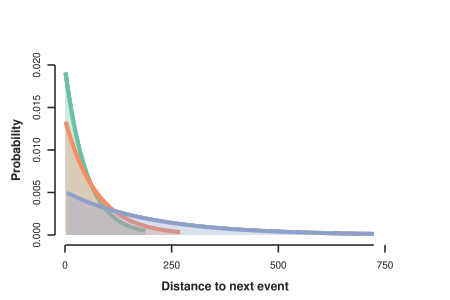

In [66]:
ipcoal.smc.plot_waiting_distance_distributions(stree, gtree, imap, RECOMB)

## Visualize probabilities along branches

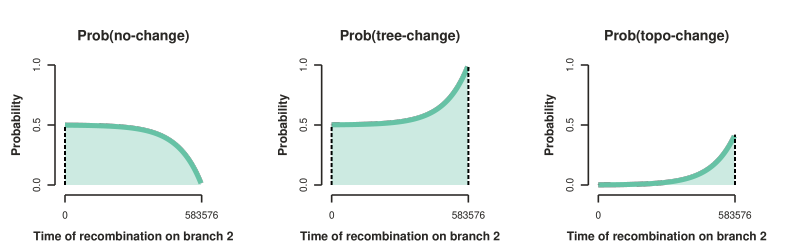

In [67]:
ipcoal.smc.plot_edge_probabilities(stree, gtree, imap, branch=BRANCH, stack=0)

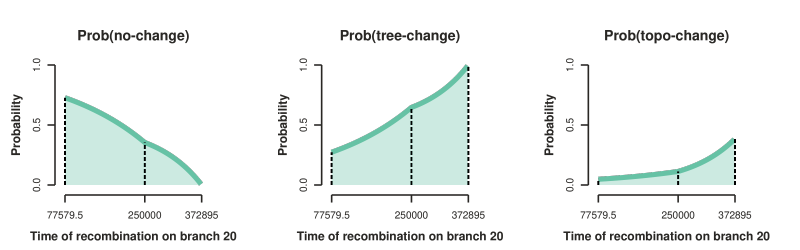

In [68]:
ipcoal.smc.plot_edge_probabilities(stree, gtree, imap, branch=20, stack=0)

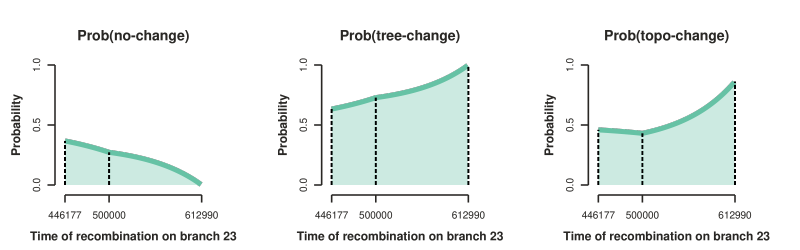

In [69]:
ipcoal.smc.plot_edge_probabilities(stree, gtree, imap, branch=23, stack=0)

## Compare MS-SMC expectations to simulations

In [85]:
# simulate one long chromosome
model2 = ipcoal.Model(tree=stree, nsamples=NSAMPLES, seed_trees=SEED, store_tree_sequences=True, recomb=RECOMB)
model2.sim_trees(nloci=1, nsites=2e6)
print(f"simulated {model2.df.shape[0]} tree-change events")

simulated 27894 tree-change events


### Get the OBSERVED mean distance between tree-change events

In [86]:
dists = model2.df.nbps
print(f"Observed distance between tree-changes: {dists.mean():.2f}")

Observed distance between tree-changes: 71.70


### View summary of tree sequence

In [87]:
# load as a ToyTreeSequence object
tts = toytree.utils.toytree_sequence(model2.ts_dict[0], sample=10)

# draw the first 8 trees in the sequence.
tts.draw_tree_sequence(max_trees=8, width=1000, node_sizes=6, node_colors="black");

⚠️ toytree | toytree_sequence:_get_subsampled_ts:126 | [12, 13, 15, 14, 9, 8, 10, 11, 1, 0, 3, 2, 5, 4, 6, 7]


<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1000.0px" height="325.0px" viewBox="0 0 1000.0 325.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t66923b32471e4377bf9af41e677091fa"> 0 400000 800000 1200000 <polygon points="50.0,56.61462076174302 57.081545064377686,83.07310380871499 57.081545064377686,215.36551904357484 167.81115879828326,215.36551904357484 167.81115879828326,83.07310380871499 287.5069975741743,56.61462076174302 287.5069975741743,56.61462076174302 167.81115879828326,56.61462076174302 167.81115879828326,56.61462076174302 57.081545064377686,56.61462076174302 57.081545064377686,56.61462076174302 50.0,56.61462076174302" style="fill:rgb(40%,76.1%,64.7%);fill-opacity:0.25;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:0.5"> idx: 0
interval: (0 - 74)
tmrca: 1150937.28 idx: 1
interval: (74 - 107)
tmrca: 1150937.28 idx: 2
interval: (107 - 133)
tmrca: 1150937.28 <polygon points="476.87068482925923,56.61462076174302 389.27038626609436,83.07310380871499 389.27038626609436,215.36551904357484 500.0,215.36551904357484 500.0,83.07310380871499 525.0139951483486,56.61462076174302 525.0139951483486,56.61462076174302 500.0,56.61462076174302 500.0,56.61462076174302 389.27038626609436,56.61462076174302 389.27038626609436,56.61462076174302 476.87068482925923,56.61462076174302" style="fill:rgb(90.6%,54.1%,76.5%);fill-opacity:0.25;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:0.5"> idx: 3
interval: (133 - 148)
tmrca: 1150937.28 <polygon points="525.0139951483486,56.61462076174302 500.0,83.07310380871499 500.0,215.36551904357484 610.7296137339056,215.36551904357484 610.7296137339056,83.07310380871499 704.7490203396156,56.61462076174302 704.7490203396156,56.61462076174302 610.7296137339056,56.61462076174302 610.7296137339056,56.61462076174302 500.0,56.61462076174302 500.0,56.61462076174302 525.0139951483486,56.61462076174302" style="fill:rgb(65.1%,84.7%,32.9%);fill-opacity:0.25;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:0.5"> idx: 4
interval: (148 - 204)
tmrca: 1150937.28 <polygon points="704.7490203396156,56.61462076174302 610.7296137339056,83.07310380871499 610.7296137339056,215.36551904357484 721.4592274678113,215.36551904357484 721.4592274678113,83.07310380871499 826.7120731479755,56.61462076174302 826.7120731479755,56.61462076174302 721.4592274678113,56.61462076174302 721.4592274678113,56.61462076174302 610.7296137339056,56.61462076174302 610.7296137339056,56.61462076174302 704.7490203396156,56.61462076174302" style="fill:rgb(100%,85.1%,18.4%);fill-opacity:0.25;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:0.5"> idx: 5
interval: (204 - 242)
tmrca: 1150937.28 <polygon points="826.7120731479755,56.61462076174302 721.4592274678113,83.07310380871499 721.4592274678113,215.36551904357484 832.1888412017167,215.36551904357484 832.1888412017167,83.07310380871499 926.2082478074268,56.61462076174302 926.2082478074268,56.61462076174302 832.1888412017167,56.61462076174302 832.1888412017167,56.61462076174302 721.4592274678113,56.61462076174302 721.4592274678113,56.61462076174302 826.7120731479755,56.61462076174302" style="fill:rgb(89.8%,76.9%,58%);fill-opacity:0.25;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:0.5"> idx: 6
interval: (242 - 273)
tmrca: 1150937.28 <polygon points="926.2082478074268,56.61462076174302 832.1888412017167,83.07310380871499 832.1888412017167,215.36551904357484 942.9184549356223,215.36551904357484 942.9184549356223,83.07310380871499 950.0,56.61462076174302 950.0,56.61462076174302 942.9184549356223,56.61462076174302 942.9184549356223,56.61462076174302 832.1888412017167,56.61462076174302 832.1888412017167,56.61462076174302

### Get the EXPECTED mean distance between tree-change events
The MS-SMC can calculate an expected distance for any individual genealogy embedded in a species tree. To get an expectation for the species tree, we simply calculate the mean of expectations from many *unlinked* genealogies simulated on a species tree.

In [88]:
# load as ToyTrees
gtrees = toytree.mtree(model.df.genealogy)

In [89]:
# get waiting distances to topology changes
dists = [
    ipcoal.smc.get_expected_waiting_distance_to_tree_change(model.tree, i, imap, RECOMB)
    for i in gtrees
]
print(f"Expected distance between tree-changes: {np.mean(dists):.2f}")

Expected distance between tree-changes: 73.15
